#### Importing necessary libraries

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [46]:
df = pd.read_csv('Dataset11-Weather-Data.csv')

In [47]:
df.head()

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog


In [48]:
df.shape

(8784, 8)

In [49]:
df.columns

Index(['Date/Time', 'Temp_C', 'Dew Point Temp_C', 'Rel Hum_%',
       'Wind Speed_km/h', 'Visibility_km', 'Press_kPa', 'Weather'],
      dtype='object')

In [50]:
df.dtypes

Date/Time            object
Temp_C              float64
Dew Point Temp_C    float64
Rel Hum_%             int64
Wind Speed_km/h       int64
Visibility_km       float64
Press_kPa           float64
Weather              object
dtype: object

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date/Time         8784 non-null   object 
 1   Temp_C            8784 non-null   float64
 2   Dew Point Temp_C  8784 non-null   float64
 3   Rel Hum_%         8784 non-null   int64  
 4   Wind Speed_km/h   8784 non-null   int64  
 5   Visibility_km     8784 non-null   float64
 6   Press_kPa         8784 non-null   float64
 7   Weather           8784 non-null   object 
dtypes: float64(4), int64(2), object(2)
memory usage: 549.1+ KB


In [52]:
df.Weather.value_counts()

Weather
Mainly Clear                               2106
Mostly Cloudy                              2069
Cloudy                                     1728
Clear                                      1326
Snow                                        390
Rain                                        306
Rain Showers                                188
Fog                                         150
Rain,Fog                                    116
Drizzle,Fog                                  80
Snow Showers                                 60
Drizzle                                      41
Snow,Fog                                     37
Snow,Blowing Snow                            19
Rain,Snow                                    18
Thunderstorms,Rain Showers                   16
Haze                                         16
Drizzle,Snow,Fog                             15
Freezing Rain                                14
Freezing Drizzle,Snow                        11
Freezing Drizzle                

In [53]:
df.Weather.unique()

array(['Fog', 'Freezing Drizzle,Fog', 'Mostly Cloudy', 'Cloudy', 'Rain',
       'Rain Showers', 'Mainly Clear', 'Snow Showers', 'Snow', 'Clear',
       'Freezing Rain,Fog', 'Freezing Rain', 'Freezing Drizzle',
       'Rain,Snow', 'Moderate Snow', 'Freezing Drizzle,Snow',
       'Freezing Rain,Snow Grains', 'Snow,Blowing Snow', 'Freezing Fog',
       'Haze', 'Rain,Fog', 'Drizzle,Fog', 'Drizzle',
       'Freezing Drizzle,Haze', 'Freezing Rain,Haze', 'Snow,Haze',
       'Snow,Fog', 'Snow,Ice Pellets', 'Rain,Haze', 'Thunderstorms,Rain',
       'Thunderstorms,Rain Showers', 'Thunderstorms,Heavy Rain Showers',
       'Thunderstorms,Rain Showers,Fog', 'Thunderstorms',
       'Thunderstorms,Rain,Fog',
       'Thunderstorms,Moderate Rain Showers,Fog', 'Rain Showers,Fog',
       'Rain Showers,Snow Showers', 'Snow Pellets', 'Rain,Snow,Fog',
       'Moderate Rain,Fog', 'Freezing Rain,Ice Pellets,Fog',
       'Drizzle,Ice Pellets,Fog', 'Drizzle,Snow', 'Rain,Ice Pellets',
       'Drizzle,Snow,Fog', 

In [54]:
df.Weather.nunique()

50

##### Converting the Weather Categories into Standard Categories

In [55]:
x = 'Thunderstorms,Moderate Rain,Fog'

list_of_lists = [w.split() for w in x.split(',')]
list_of_lists

In [56]:
list_of_lists = [w.split() for w in x.split(',')] 
list_of_lists

[['Thunderstorms'], ['Moderate', 'Rain'], ['Fog']]

In [57]:
from itertools import chain
flat_list = list(chain(*list_of_lists))
flat_list
                 

['Thunderstorms', 'Moderate', 'Rain', 'Fog']

In [58]:
def Create_list(x):
    list_of_lists = [w.split() for w in x.split(',')] 
    flat_list = list(chain(*list_of_lists))
    return flat_list

def Get_Weather(list1):
    if 'Fog' in list1 and 'Rain' in list1:
        return 'RAIN+FOG'
    elif 'Snow' in list1 and 'Rain' in list1:
        return 'SNOW+Rain'
        
    elif 'Snow' in list1:
        return 'SNOW'
    elif 'Rain' in list1:
        return 'RAIN'
    elif 'Fog' in list1:
        return 'FOG'
    elif 'Clear' in list1:
        return 'CLEAR'
    elif 'Cloudy' in list1:
        return 'Cloudy'
    else:
        return 'RAIN'


In [59]:
Create_list(x)

['Thunderstorms', 'Moderate', 'Rain', 'Fog']

In [60]:
Get_Weather(Create_list(x))

'RAIN+FOG'

In [61]:
df['Std_Weather'] = df['Weather'].apply(lambda x : Get_Weather(Create_list(x)))

In [62]:
df.head()

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather,Std_Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog,FOG
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog,FOG
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog",FOG
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog",FOG
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog,FOG


In [63]:
df.Std_Weather.value_counts()

Std_Weather
Cloudy       3797
CLEAR        3432
RAIN          603
SNOW          556
FOG           241
RAIN+FOG      129
SNOW+Rain      26
Name: count, dtype: int64

##### Sample Selection and data balancing

In [64]:
cloudy_df = df[df['Std_Weather'] == 'Cloudy'].sample(600)


In [65]:
clear_df = df[df['Std_Weather'] == 'CLEAR'].sample(600)
clear_df.shape


(600, 9)

##### Dataset balancing

In [66]:
rain_df = df[df['Std_Weather'] == 'RAIN']
snow_df = df[df['Std_Weather'] == 'SNOW']

In [67]:
rain_df.shape

(603, 9)

In [68]:
snow_df.shape

(556, 9)

##### Create New Weather Dataset:

In [69]:
weather_df = pd.concat([cloudy_df,clear_df,rain_df,snow_df],axis=0)
weather_df.shape

(2359, 9)

In [70]:
weather_df.Std_Weather.value_counts()

Std_Weather
RAIN      603
Cloudy    600
CLEAR     600
SNOW      556
Name: count, dtype: int64

In [71]:
weather_df.head()

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather,Std_Weather
292,1/13/2012 4:00,-5.0,-7.4,83,24,11.3,99.13,Cloudy,Cloudy
8100,12/3/2012 12:00,3.9,1.3,83,9,24.1,101.96,Cloudy,Cloudy
7164,10/25/2012 12:00,11.3,1.4,50,13,24.1,101.77,Cloudy,Cloudy
2336,4/7/2012 8:00,4.5,-9.3,36,11,48.3,101.51,Mostly Cloudy,Cloudy
4872,7/22/2012 0:00,22.7,14.9,61,11,25.0,101.19,Cloudy,Cloudy


#####  Drop Columns Date/Time and Weather:

In [72]:
weather_df.drop(columns = ['Date/Time','Weather'],axis=1,inplace = True)

In [73]:
weather_df.head(100)

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Std_Weather
292,-5.0,-7.4,83,24,11.3,99.13,Cloudy
8100,3.9,1.3,83,9,24.1,101.96,Cloudy
7164,11.3,1.4,50,13,24.1,101.77,Cloudy
2336,4.5,-9.3,36,11,48.3,101.51,Cloudy
4872,22.7,14.9,61,11,25.0,101.19,Cloudy
...,...,...,...,...,...,...,...
7503,5.2,-3.3,54,20,24.1,101.18,Cloudy
8517,0.7,-2.3,80,22,25.0,101.00,Cloudy
2514,14.5,-2.7,30,13,48.3,100.95,Cloudy
4257,16.9,10.5,66,9,24.1,100.16,Cloudy


##### Duplicate Records:

In [74]:
weather_df.duplicated().sum()

0

In [75]:
weather_df.dtypes

Temp_C              float64
Dew Point Temp_C    float64
Rel Hum_%             int64
Wind Speed_km/h       int64
Visibility_km       float64
Press_kPa           float64
Std_Weather          object
dtype: object

##### Data Visualizations:

In [76]:
weather_df.describe()

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa
count,2359.000000,2359.000000,2359.000000,2359.000000,2359.000000,2359.000000
mean,6.708266,1.619161,72.252226,16.683764,23.124883,100.801229
std,11.439287,10.620151,15.923946,9.334289,12.640761,0.909409
min,-21.000000,-26.800000,20.000000,0.000000,0.600000,97.520000
25%,-3.000000,-7.000000,62.000000,9.000000,16.100000,100.305000
50%,5.500000,0.500000,76.000000,15.000000,24.100000,100.820000
75%,16.600000,10.700000,85.000000,22.000000,25.000000,101.410000
max,32.500000,23.100000,99.000000,63.000000,48.300000,103.610000


##### Correlation among the features:

In [77]:
cols = ['Temp_C','Dew Point Temp_C','Rel Hum_%','Wind Speed_km/h','Visibility_km','Press_kPa']

In [78]:
cor_matrix = weather_df[cols].corr()
cor_matrix

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa
Temp_C,1.000000,0.942708,-0.242808,-0.116156,0.384684,-0.089727
Dew Point Temp_C,0.942708,1.000000,0.088213,-0.111645,0.177514,-0.199158
Rel Hum_%,-0.242808,0.088213,1.000000,0.025642,-0.655984,-0.332303
Wind Speed_km/h,-0.116156,-0.111645,0.025642,1.000000,-0.146470,-0.396638
Visibility_km,0.384684,0.177514,-0.655984,-0.146470,1.000000,0.339245
Press_kPa,-0.089727,-0.199158,-0.332303,-0.396638,0.339245,1.000000


##### Heat map

<Axes: >

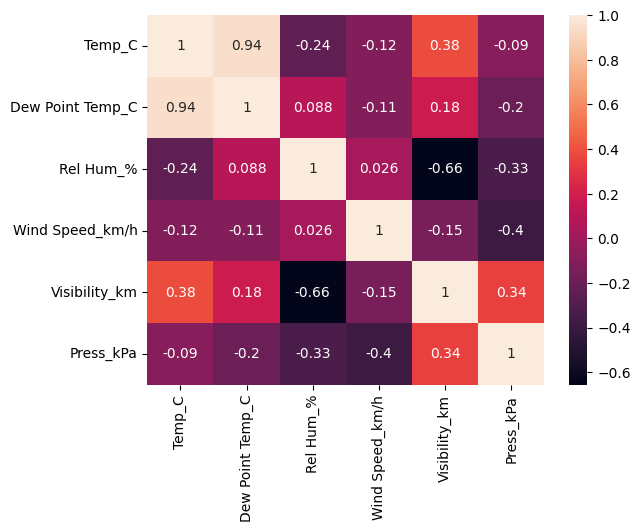

In [79]:
sns.heatmap(cor_matrix,annot = True)

In [80]:
weather_df.columns

Index(['Temp_C', 'Dew Point Temp_C', 'Rel Hum_%', 'Wind Speed_km/h',
       'Visibility_km', 'Press_kPa', 'Std_Weather'],
      dtype='object')

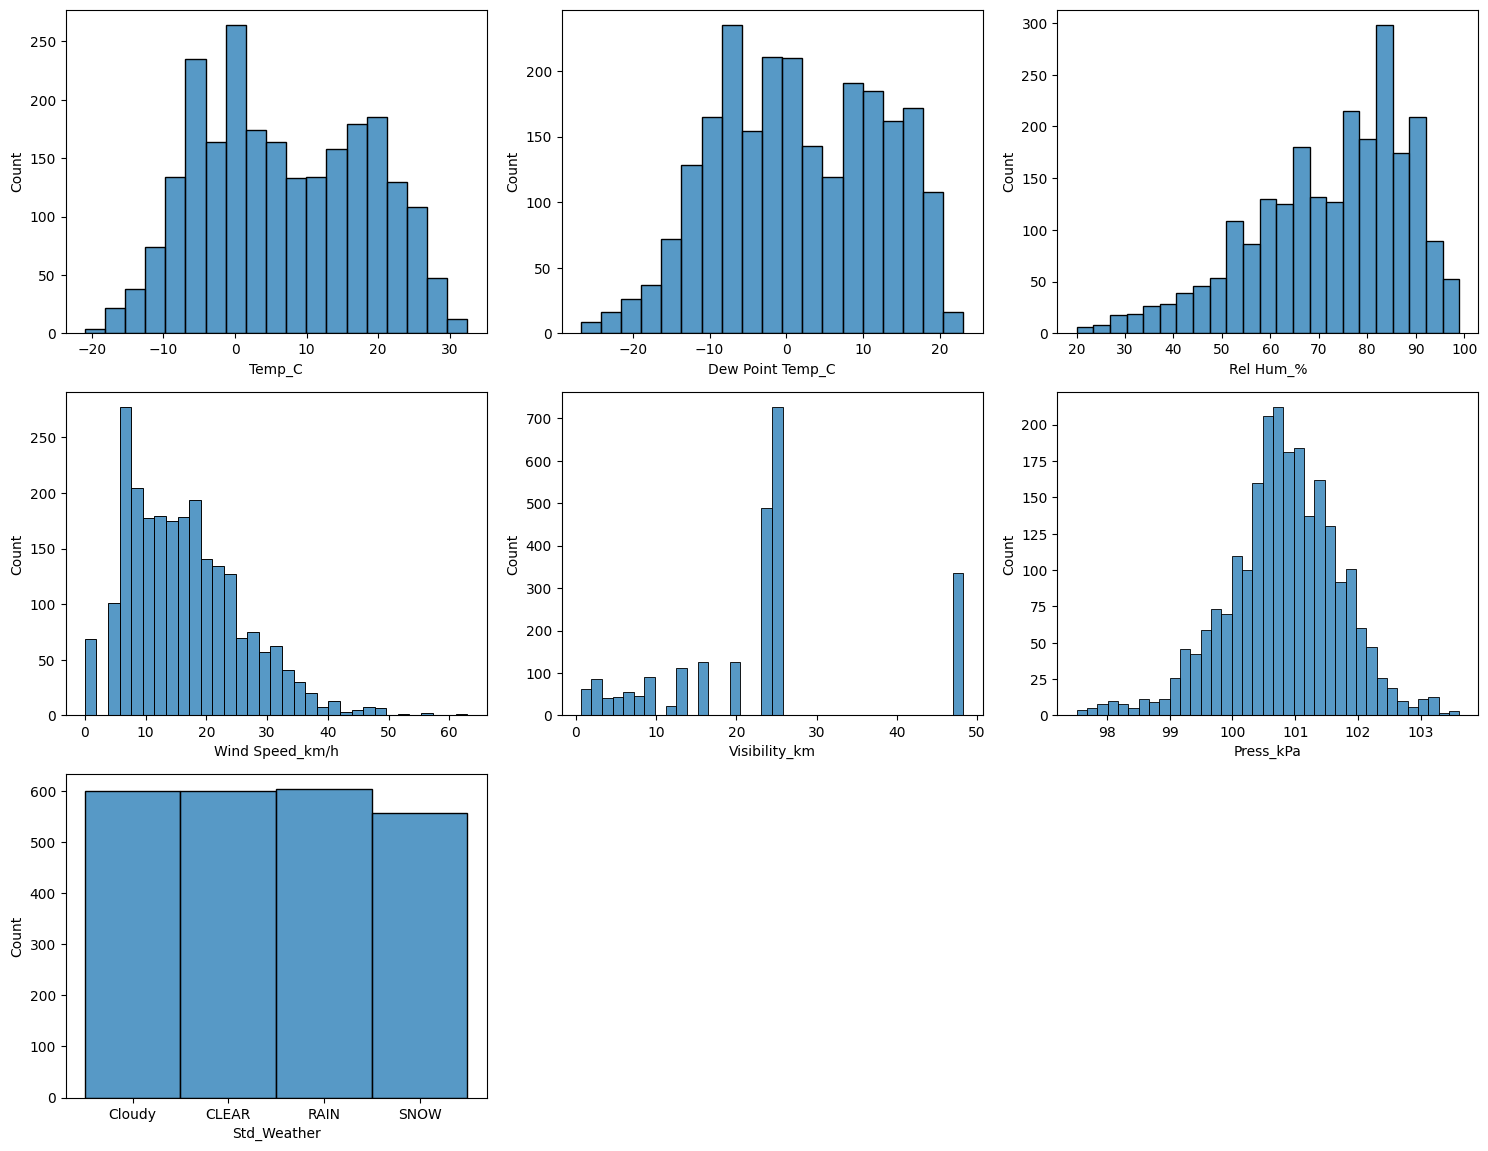

In [81]:
plt.figure(figsize=(15,15),facecolor='white')
plotnumber = 1
for i in weather_df.columns:
 ax = plt.subplot(4,3,plotnumber)
 sns.histplot(weather_df[i])
 plt.xlabel(i,fontsize=10)
 plotnumber +=1
plt.tight_layout()
plt.show()


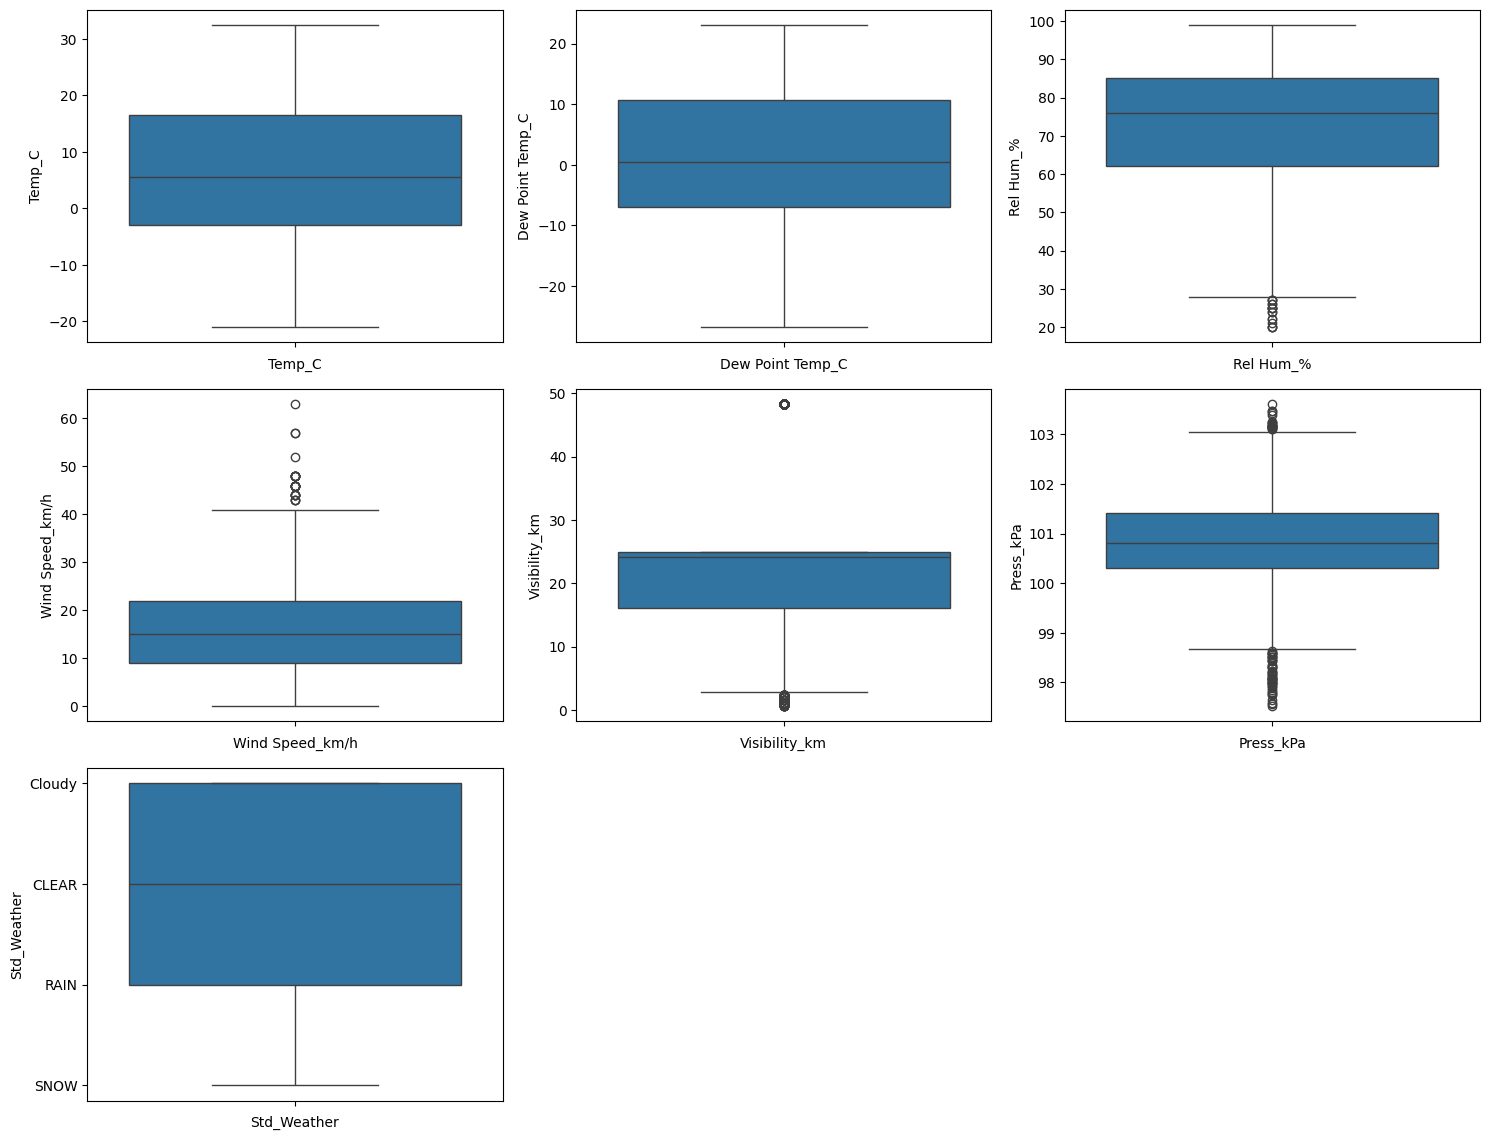

In [82]:
plt.figure(figsize = (15,15), facecolor = 'white')
plotnumber = 1
for i in weather_df.columns:
 ax = plt.subplot(4,3, plotnumber)
 sns.boxplot(weather_df[i])
 plt.xlabel(i, fontsize = 10)
 plotnumber +=1
plt.tight_layout()
plt.show()

##### Label Encoding

In [83]:
from sklearn.preprocessing import LabelEncoder

In [84]:
label_Encoder = LabelEncoder()

In [85]:
weather_df['Std_Weather'] = label_Encoder.fit_transform(weather_df['Std_Weather'])

In [86]:
label_Encoder.classes_

array(['CLEAR', 'Cloudy', 'RAIN', 'SNOW'], dtype=object)

In [87]:
weather_df.head()

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Std_Weather
292,-5.0,-7.4,83,24,11.3,99.13,1
8100,3.9,1.3,83,9,24.1,101.96,1
7164,11.3,1.4,50,13,24.1,101.77,1
2336,4.5,-9.3,36,11,48.3,101.51,1
4872,22.7,14.9,61,11,25.0,101.19,1


In [88]:
weather_df.Std_Weather.value_counts()

Std_Weather
2    603
1    600
0    600
3    556
Name: count, dtype: int64

##### X,y variables:

In [89]:
X = weather_df.drop(['Std_Weather'],axis = 1)

In [90]:
X

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa
292,-5.0,-7.4,83,24,11.3,99.13
8100,3.9,1.3,83,9,24.1,101.96
7164,11.3,1.4,50,13,24.1,101.77
2336,4.5,-9.3,36,11,48.3,101.51
4872,22.7,14.9,61,11,25.0,101.19
...,...,...,...,...,...,...
8779,0.1,-2.7,81,30,9.7,100.13
8780,0.2,-2.4,83,24,9.7,100.03
8781,-0.5,-1.5,93,28,4.8,99.95
8782,-0.2,-1.8,89,28,9.7,99.91


In [91]:
y = weather_df['Std_Weather']

In [92]:
y

292     1
8100    1
7164    1
2336    1
4872    1
       ..
8779    3
8780    3
8781    3
8782    3
8783    3
Name: Std_Weather, Length: 2359, dtype: int32

##### Feature Scaling:

In [93]:
from sklearn.preprocessing import StandardScaler

In [94]:
std_scaler = StandardScaler()

In [95]:
X_std = std_scaler.fit_transform(X)

In [96]:
X_std

array([[-1.02373063, -0.84942979,  0.67508726,  0.78396828, -0.93565494,
        -1.8380993 ],
       [-0.24554516, -0.03005874,  0.67508726, -0.82335066,  0.07715701,
         1.27447233],
       [ 0.40148545, -0.02064068, -1.39770275, -0.39473228,  0.07715701,
         1.06550109],
       ...,
       [-0.63026607, -0.29376436,  1.30320545,  1.21258667, -1.4499735 ,
        -0.93622342],
       [-0.6040351 , -0.32201854,  1.05195817,  1.21258667, -1.06225643,
        -0.98021737],
       [-0.58654778, -0.35027271,  0.86352272,  1.42689586, -0.93565494,
        -1.00221434]])

##### 

##### Splitting Data into training and testing:

In [97]:
from sklearn.model_selection import train_test_split

In [98]:
X_train,X_test,y_train,y_test = train_test_split(X_std,y,test_size=0.2,random_state=42)

In [99]:
X_train.shape,X_test.shape

((1887, 6), (472, 6))

##### Model Building:

In [100]:
from sklearn.tree import DecisionTreeClassifier
decision_tree_model = DecisionTreeClassifier()

##### Model Predictions:

In [101]:
decision_tree_model.fit(X_train,y_train)

DecisionTreeClassifier()

In [102]:
y_pred = decision_tree_model.predict(X_test)

##### Model Evaluations:

In [103]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

##### Accuracy:

In [104]:
accuracy_score(y_test,y_pred)

0.5911016949152542

##### Classification Report:

In [105]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.54      0.59      0.56       118
           1       0.42      0.38      0.40       128
           2       0.68      0.70      0.69       126
           3       0.76      0.72      0.74       100

    accuracy                           0.59       472
   macro avg       0.60      0.60      0.60       472
weighted avg       0.59      0.59      0.59       472



##### Confusion Matrix:

cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt='d')

In [106]:
from sklearn.ensemble import RandomForestClassifier

In [107]:
rf_model = RandomForestClassifier()

In [108]:
rf_model.fit(X_train,y_train)

RandomForestClassifier()

In [109]:
y_pred_rf = rf_model.predict(X_test)

In [110]:
accuracy_score(y_test,y_pred)

0.5911016949152542

##### Building multiple models: Best model:

In [136]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
#from sklearn.ensemble import ExtraTreesClassifier


In [137]:
dt_model = DecisionTreeClassifier()
rf_model = RandomForestClassifier()
svc_model = SVC()
knn_model = KNeighborsClassifier()
lr_model = LogisticRegression()
nb_model = GaussianNB()
gb_model = GradientBoostingClassifier()
ab_model = AdaBoostClassifier()
#ex_model = ExtraTreesClassifier()

In [138]:
model_list = [dt_model,rf_model,svc_model,knn_model,lr_model,nb_model,gb_model,ab_model]

In [139]:
acc_list = []
for model in model_list:
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test,y_pred)
    acc_list.append(acc)

In [140]:
acc_list

[0.5805084745762712,
 0.673728813559322,
 0.6271186440677966,
 0.6207627118644068,
 0.6101694915254238,
 0.5953389830508474,
 0.6652542372881356,
 0.5614406779661016]

In [142]:
model_df = pd.DataFrame({'Model' : model_list, "Accuracy" : acc_list})
model_df.sort_values(by=["Accuracy"],ascending=False)

,Model,Accuracy
1,"(DecisionTreeClassifier(max_features='sqrt', r...",0.673729
6,([DecisionTreeRegressor(criterion='friedman_ms...,0.665254
2,SVC(),0.627119
3,KNeighborsClassifier(),0.620763
4,LogisticRegression(),0.610169
5,GaussianNB(),0.595339
0,DecisionTreeClassifier(),0.580508
7,"(DecisionTreeClassifier(max_depth=1, random_st...",0.561441


##### K-fold cross validation

In [158]:
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import cross_val_score

models = [dt_model,rf_model,svc_model,knn_model,lr_model,nb_model,gb_model,ab_model]
features = X_std
labels = y
CV = 5
accu_list = []
ModelName = []

for model in models:
    model_name = model.__class__.__name__
    accuracies = cross_val_score(model,features,labels,scoring="accuracy",cv = CV)
    accu_list.append(accuracies.mean()*100)
    ModelName.append(model_name)

model_acc_df = pd.DataFrame({"Model":ModelName,"Cross_Val_Accuracy": accu_list})
model_acc_df


,Model,Cross_Val_Accuracy
0,DecisionTreeClassifier,55.999766
1,RandomForestClassifier,63.545378
2,SVC,60.876786
3,KNeighborsClassifier,55.916280
4,LogisticRegression,60.241013
5,GaussianNB,59.052143
6,GradientBoostingClassifier,63.461801
7,AdaBoostClassifier,57.184407


In [160]:
model_acc_df.sort_values(by=["Cross_Val_Accuracy"],ascending=False)

,Model,Cross_Val_Accuracy
1,RandomForestClassifier,63.545378
6,GradientBoostingClassifier,63.461801
2,SVC,60.876786
4,LogisticRegression,60.241013
5,GaussianNB,59.052143
7,AdaBoostClassifier,57.184407
0,DecisionTreeClassifier,55.999766
3,KNeighborsClassifier,55.916280


### Model Evaluations:


In [162]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

### Classification Report

In [163]:
rf_model.fit(X_train,y_train)

RandomForestClassifier()

In [166]:
y_pred = rf_model.predict(X_test)

In [167]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.59      0.73      0.65       118
           1       0.54      0.44      0.48       128
           2       0.76      0.74      0.75       126
           3       0.80      0.80      0.80       100

    accuracy                           0.67       472
   macro avg       0.67      0.68      0.67       472
weighted avg       0.67      0.67      0.66       472



### Confusion Matrix

<Axes: >

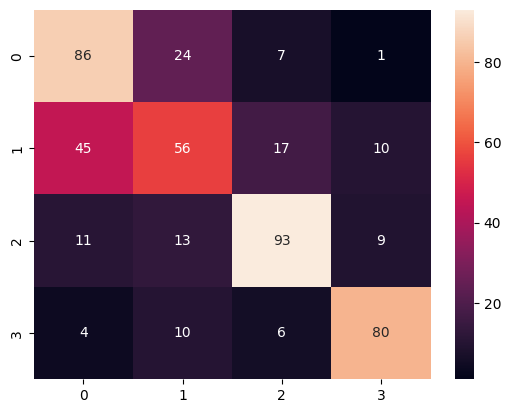

In [171]:
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt = "d")

### Hyperparameter tunning

In [172]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [174]:
parameters = { "n_estimators" :[50,100],
              "max_features" : ["sqrt","log2"],
              "criterion":["gini","entropy"]}

In [175]:
grid_search = GridSearchCV(estimator=rf_model,param_grid = parameters)

In [176]:
grid_search.fit(X_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [50, 100]})

### Best Hyperparamaeters

In [178]:
grid_search.best_params_

{'criterion': 'gini', 'max_features': 'sqrt', 'n_estimators': 50}

In [179]:
RF_model = RandomForestClassifier(criterion="gini",max_features="sqrt",n_estimators=50)

In [180]:
RF_model.fit(X_train,y_train)

RandomForestClassifier(n_estimators=50)

In [182]:
y_pred_RF=RF_model.predict(X_test)

In [183]:
accuracy_score(y_test,y_pred_RF)

0.6800847457627118

In [184]:
weather_df.head()

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Std_Weather
292,-5.0,-7.4,83,24,11.3,99.13,1
8100,3.9,1.3,83,9,24.1,101.96,1
7164,11.3,1.4,50,13,24.1,101.77,1
2336,4.5,-9.3,36,11,48.3,101.51,1
4872,22.7,14.9,61,11,25.0,101.19,1


In [190]:
Temperature = float(input("Enter the Temperature in Celcius = "))
Dew_point = float(input("Enter the Dew point Temp_C = "))
Relative_humidity = float(input("Enter the Relative humidity %= "))
Wind_Speed = float(input("Enter the Wind Speed(km/hr) = "))
Visibility = float(input("Enter the Visibility_km = "))
Pressure = float(input("Enter the Pressure_kpa = "))


Enter the Temperature in Celcius =  67
Enter the Dew point Temp_C =  89
Enter the Relative humidity %=  34
Enter the Wind Speed(km/hr) =  90
Enter the Visibility_km =  13
Enter the Pressure_kpa =  56


In [191]:
input_data = [Temperature,Dew_point,Relative_humidity,Wind_Speed,Visibility,Pressure]
scaled_data = std_scaler.transform([input_data])
prediction = RF_model.predict(scaled_data)
prediction

array([0])

In [194]:
if prediction[0] == 0:
    print('Weather is CLEAR ')
elif prediction[0] == 1:
    print('Weather is CLOUDY')
elif prediction[0] == 2:
    print('Weather is RAINY')
else:
    print('Weather is SNOWY')


Weather is CLEAR 


### WEATHER  PREDICTION  MODEL

In [197]:
Temperature = float(input("Enter the Temperature in Celcius = "))
Dew_point = float(input("Enter the Dew point Temp_C = "))
Relative_humidity = float(input("Enter the Relative humidity %= "))
Wind_Speed = float(input("Enter the Wind Speed(km/hr) = "))
Visibility = float(input("Enter the Visibility_km = "))
Pressure = float(input("Enter the Pressure_kpa = "))

input_data = [Temperature,Dew_point,Relative_humidity,Wind_Speed,Visibility,Pressure]
scaled_data = std_scaler.transform([input_data])
prediction = RF_model.predict(scaled_data)

print("")
print("************Weather Prediction Model************")
print("")

if prediction[0] == 0:
    print('Weather is CLEAR ')
elif prediction[0] == 1:
    print('Weather is CLOUDY')
elif prediction[0] == 2:
    print('Weather is RAINY')
else:
    print('Weather is SNOWY')



Enter the Temperature in Celcius =  12
Enter the Dew point Temp_C =  -10.2
Enter the Relative humidity %=  64
Enter the Wind Speed(km/hr) =  20
Enter the Visibility_km =  19
Enter the Pressure_kpa =  100.2



************Weather Prediction Model************

Weather is SNOWY


In [198]:
import pickle

In [201]:
import pickle

# Save the model to a file
with open('weather_prediction_model.pkl', 'wb') as file:
    pickle.dump(RF_model, file)